In [ ]:
from google.colab import files
upload = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv
Saving valid.csv to valid.csv


In [ ]:
import pandas as pd
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')
df_valid = pd.read_csv('/content/valid.csv')
df = df_train.append(df_valid, ignore_index=True)

In [ ]:
df = df.append(df_test, ignore_index=True)

In [ ]:
df.head()

,id,text,label
0,219,Nikmati cicilan 0% hingga 12 bulan untuk pemes...,neutral
1,209,Kue-kue yang disajikan bikin saya bernostalgia...,positive
2,436,Ibu pernah bekerja di grab indonesia,neutral
3,394,Paling suka banget makan siang di sini ayam sa...,positive
4,592,Pelayanan bus DAMRI sangat baik,positive


In [ ]:
df.label.value_counts()

negative    383
positive    378
neutral     239
Name: label, dtype: int64

In [ ]:
import re

def cleanse(sent):
  string = sent.lower()
  string = re.sub(r'[^a-zA-Z]', ' ', string)
  return string
df['text'] = df['text'].apply(cleanse)

In [ ]:
df.head()

,id,text,label
0,219,nikmati cicilan hingga bulan untuk pemes...,neutral
1,209,kue kue yang disajikan bikin saya bernostalgia...,positive
2,436,ibu pernah bekerja di grab indonesia,neutral
3,394,paling suka banget makan siang di sini ayam sa...,positive
4,592,pelayanan bus damri sangat baik,positive


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords as stopwords_scratch

list_stopwords = stopwords_scratch.words('indonesian')
list_stopwords_en = stopwords_scratch.words('english')
list_stopwords.extend(list_stopwords_en)
list_stopwords.extend(['ya', 'yg', 'yuk', 'ga', 'dah'])
stopwords = list_stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stopwords[:3]

['ada', 'adalah', 'adanya']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=stopwords)
X = vectorizer.fit_transform(df.text.to_list())

In [ ]:
from sklearn.cluster import KMeans

true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=50, n_init=1)
model.fit(X)

KMeans(max_iter=50, n_clusters=2, n_init=1)

In [ ]:
order_centroids = model.cluster_centers_.argsort()[:, :20]
terms = vectorizer.get_feature_names()

for i in range(true_k):
  print("cluster %d:" %i),
  for ind in order_centroids[i, :10]:
    print('%s' % terms[ind])
  print()

cluster 0:
hiburan
terlanjur
terkuras
jogja
bukittinggi
jiwa
buku
terkesima
bulenya
sebenar

cluster 1:
abang
messi
mesti
meter
mewadahi
milan
miliar
milih
milihnya
merk



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_score(X, labels=model.predict(X))

0.00513694446572115

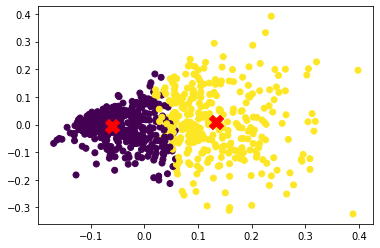

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2, random_state=0)
reduced_features = pca.fit_transform(X.toarray())

reduced_cluster_centers = pca.transform(model.cluster_centers_)

plt.scatter(reduced_features[:,0], reduced_features[:, 1], c=model.predict(X))
plt.scatter(reduced_cluster_centers[:,0], reduced_cluster_centers[:, 1], marker='X', s=200, c='r')